# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0


network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/64 (13 neurons)
Processing hyper voxel : 20/64 (13 neurons)
Processing hyper voxel : 17/64 (13 neurons)
Processing hyper voxel : 16/64 (13 neurons)
Processing hyper voxel : 5/64 (11 neurons)
Processing hyper voxel : 1/64 (9 neurons)
Processing hyper voxel : 4/64 (9 neurons)
Processing hyper voxel : 0/64 (7 neurons)
Processing hyper voxel : 37/64 (7 neurons)
Processing hyper voxel : 36/64 (5 neurons)
Processing hyper voxel : 25/64 (5 neurons)
Processing hyper voxel : 8/64 (4 neurons)
Processing hyper voxel : 33/64 (4 neurons)
Processing hyper voxel : 22/64 (3 neurons)
Processing hyper voxel : 24/64 (3 neurons)
Processing hyper voxel : 32/64 (3 neurons)
Processing hyper voxel : 9/64 (2 neurons)
Processing hyper voxel : 18/64 (2 neurons)
Processing hyper voxel : 6/64 (1 neurons)
Processing hyper voxel : 2/64 (1 neurons)
Processing hyper voxel : 26/64 (1 neurons)


In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 2688 out of total 2688 synapses
Read 85 out of total 85 gapJunctions


In [6]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listN

Loading 13 neurons with 256 synapses and 52 gap junctions
Neurons in network: 
0 : FS_0  (x: 0.004763, y: 0.003989, z: 0.007753)
1 : dSPN_3  (x: 0.004763, y: 0.004004, z: 0.007750)
2 : FS_1  (x: 0.004769, y: 0.003991, z: 0.007769)
3 : iSPN_1  (x: 0.004782, y: 0.003994, z: 0.007746)
4 : iSPN_2  (x: 0.004780, y: 0.003978, z: 0.007760)
5 : LTS_0  (x: 0.004758, y: 0.003980, z: 0.007772)
6 : FS_3  (x: 0.004746, y: 0.003995, z: 0.007776)
7 : dSPN_2  (x: 0.004753, y: 0.004009, z: 0.007779)
8 : FS_2  (x: 0.004762, y: 0.004025, z: 0.007746)
9 : dSPN_0  (x: 0.004789, y: 0.003980, z: 0.007780)
10 : iSPN_3  (x: 0.004769, y: 0.004020, z: 0.007776)
11 : iSPN_0  (x: 0.004792, y: 0.004015, z: 0.007764)
12 : dSPN_1  (x: 0.004752, y: 0.004028, z: 0.007780)


We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

In [7]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-7.json](../../snudda/data/experiment_config/pair_recording/experiment-config-7.json) file.

In [8]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "pair_recording", "experiment-config-7.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)

Loading 13 neurons with 256 synapses and 52 gap junctions
Found 0 local gap junctions on node.
Setting tmGabaA reversal potential to -65.0 mV


In [9]:
pr.run()

Running simulation for 4.0 s
Running Neuron simulator 4000 ms, with dt=0.025
1% done. Elapsed: 5.3 s, estimated time left: 521.9 s
21% done. Elapsed: 108.8 s, estimated time left: 409.2 s
41% done. Elapsed: 210.0 s, estimated time left: 302.2 s
61% done. Elapsed: 313.5 s, estimated time left: 200.4 s
81% done. Elapsed: 416.0 s, estimated time left: 97.6 s
Neuron simulation finished
Simulation run time: 513.7 s
Writing network output to networks/pair_recording_simulation/simulation/network-output-7.hdf5


## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Plotting traces: [1, 11, 12, 4, 9]
Plotted 5 traces (total 5)


<IPython.core.display.Javascript object>


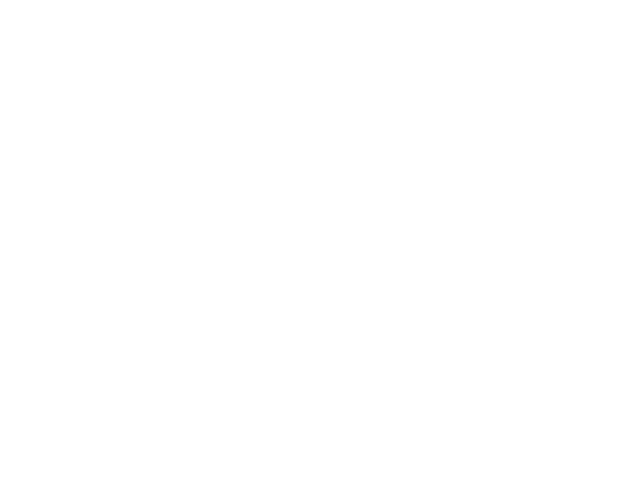

Saving to figure Network-voltage-trace-Example7-iSPN-dSPN.pdf


In [10]:
%matplotlib notebook
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 5)


<IPython.core.display.Javascript object>


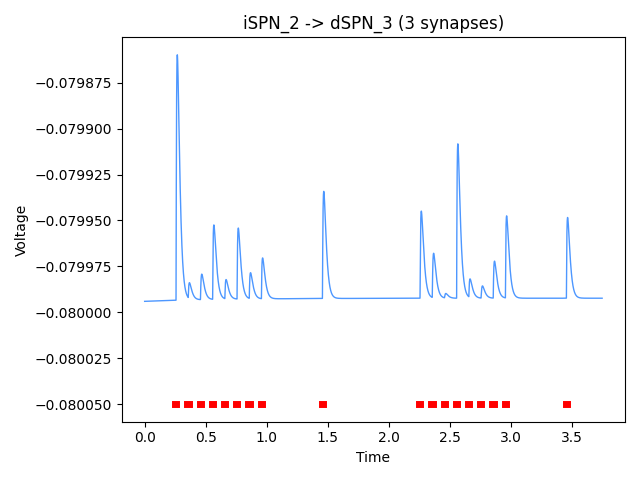

Saving to figure Current-injection-Example7-pre-4-post-1.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 5)


<IPython.core.display.Javascript object>


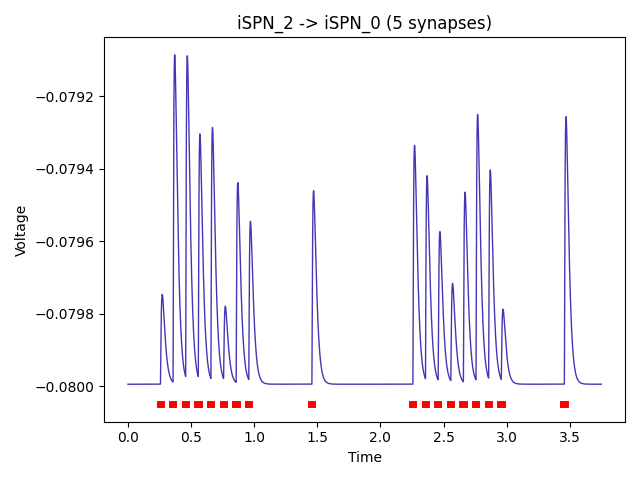

Saving to figure Current-injection-Example7-pre-4-post-11.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [12]
Plotted 1 traces (total 5)


<IPython.core.display.Javascript object>


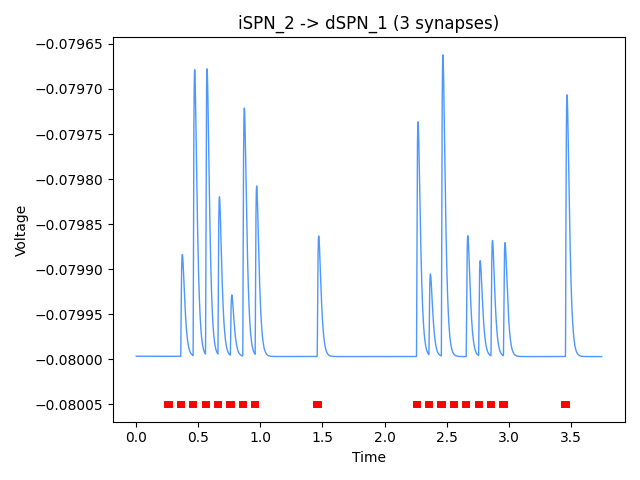

Saving to figure Current-injection-Example7-pre-4-post-12.pdf
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [9]
Plotted 1 traces (total 5)


<IPython.core.display.Javascript object>


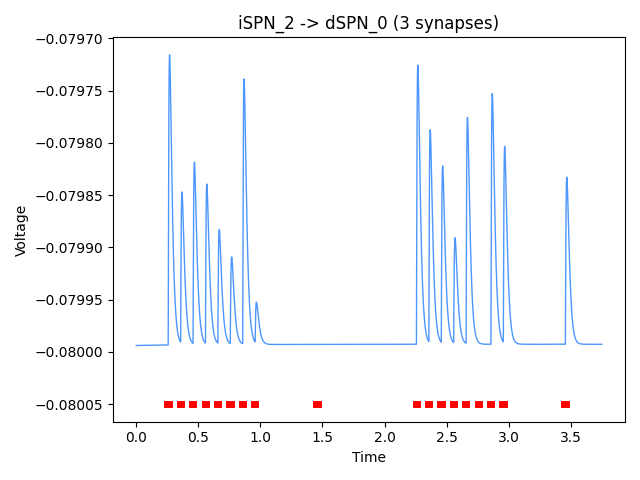

Saving to figure Current-injection-Example7-pre-4-post-9.pdf


In [11]:
%matplotlib notebook
pr.plot_traces()

Skipping trace 1, not in trace_id=[11]
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 5)


<IPython.core.display.Javascript object>


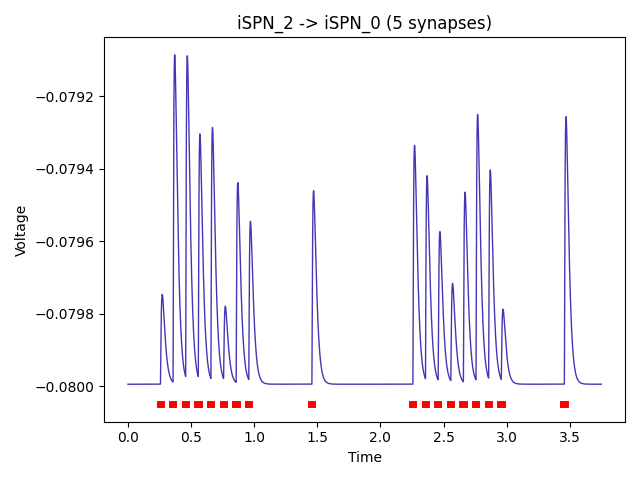

Saving to figure Current-injection-Example7-pre-4-post-11.pdf
Skipping trace 12, not in trace_id=[11]
Skipping trace 9, not in trace_id=[11]


In [12]:
pr.plot_traces(trace_id=[11])

In [13]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPre 11

Loading 13 neurons with 256 synapses and 52 gap junctions
List neurons pre-synaptic to neuronID = 11 (iSPN_0)
3 : iSPN_1 (3 synapses)
4 : iSPN_2 (5 synapses)
6 : FS_3 (3 synapses)
8 : FS_2 (12 synapses)
10 : iSPN_3 (5 synapses)


### Plotting synaptic currents

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


<IPython.core.display.Javascript object>


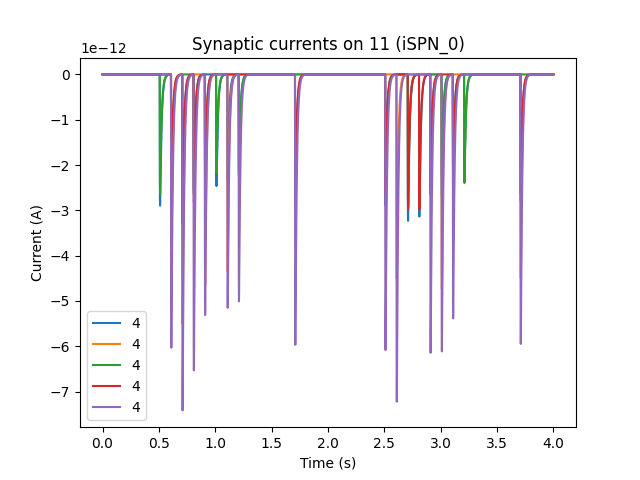

In [14]:
pr.plot_synaptic_currents(post_id=11)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


<IPython.core.display.Javascript object>


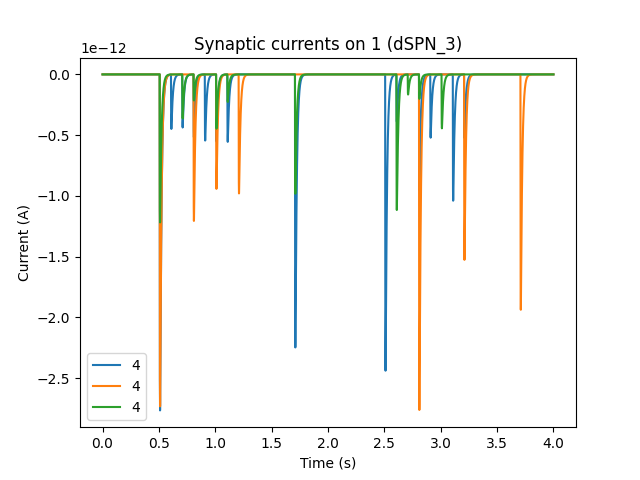

In [15]:
pr.plot_synaptic_currents(post_id=1)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


<IPython.core.display.Javascript object>


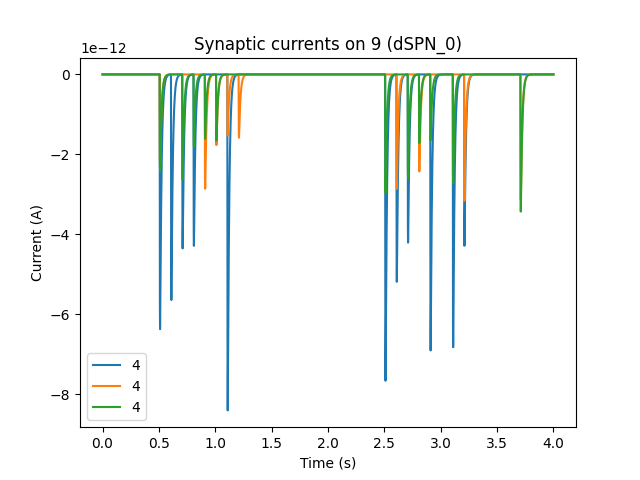

In [16]:
pr.plot_synaptic_currents(post_id=9)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading 13 neurons with 256 synapses and 52 gap junctions
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5


<IPython.core.display.Javascript object>


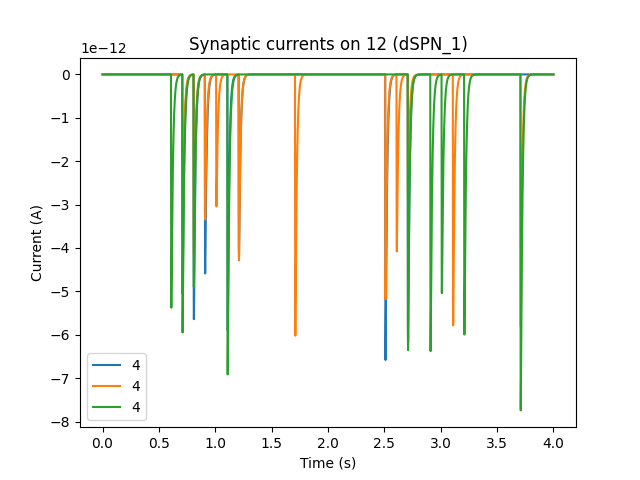

In [17]:
pr.plot_synaptic_currents(post_id=12)